In [2]:
import random
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt


In [4]:
aspirin_path = '/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_rand_rand/aspirin/probs.csv'
aspirin_df =  pd.read_csv(aspirin_path)

valid = list(set(aspirin_df["Name"]))
mol_10 = valid[:1000]

In [5]:
lengths = [len([letter for letter in x if letter=='[']) for x in mol_10]

In [6]:
data = np.zeros((len(mol_10), 500)) - 1e-9
for i, mol in enumerate(tqdm(mol_10)):
    current_probs = aspirin_df[aspirin_df["Name"]==mol]["Probability"]
    # print(i, len(current_probs))
    current_probs = current_probs[:250].to_list()
    data[i][:len(current_probs)] = current_probs
# data = np.array(data)
data

  0%|          | 0/1000 [00:00<?, ?it/s]

array([[ 1.7000000e-14,  0.0000000e+00,  0.0000000e+00, ...,
        -1.0000000e-09, -1.0000000e-09, -1.0000000e-09],
       [ 0.0000000e+00,  1.8693533e-09,  0.0000000e+00, ...,
        -1.0000000e-09, -1.0000000e-09, -1.0000000e-09],
       [ 2.0000000e-16,  0.0000000e+00,  0.0000000e+00, ...,
        -1.0000000e-09, -1.0000000e-09, -1.0000000e-09],
       ...,
       [ 1.6734020e-10,  1.0000000e-16,  0.0000000e+00, ...,
        -1.0000000e-09, -1.0000000e-09, -1.0000000e-09],
       [ 0.0000000e+00,  0.0000000e+00,  1.0310000e-13, ...,
        -1.0000000e-09, -1.0000000e-09, -1.0000000e-09],
       [ 3.6701110e-10,  1.2100000e-14,  7.9290890e-10, ...,
        -1.0000000e-09, -1.0000000e-09, -1.0000000e-09]])

In [33]:
data[data==-1e-9] = np.nan

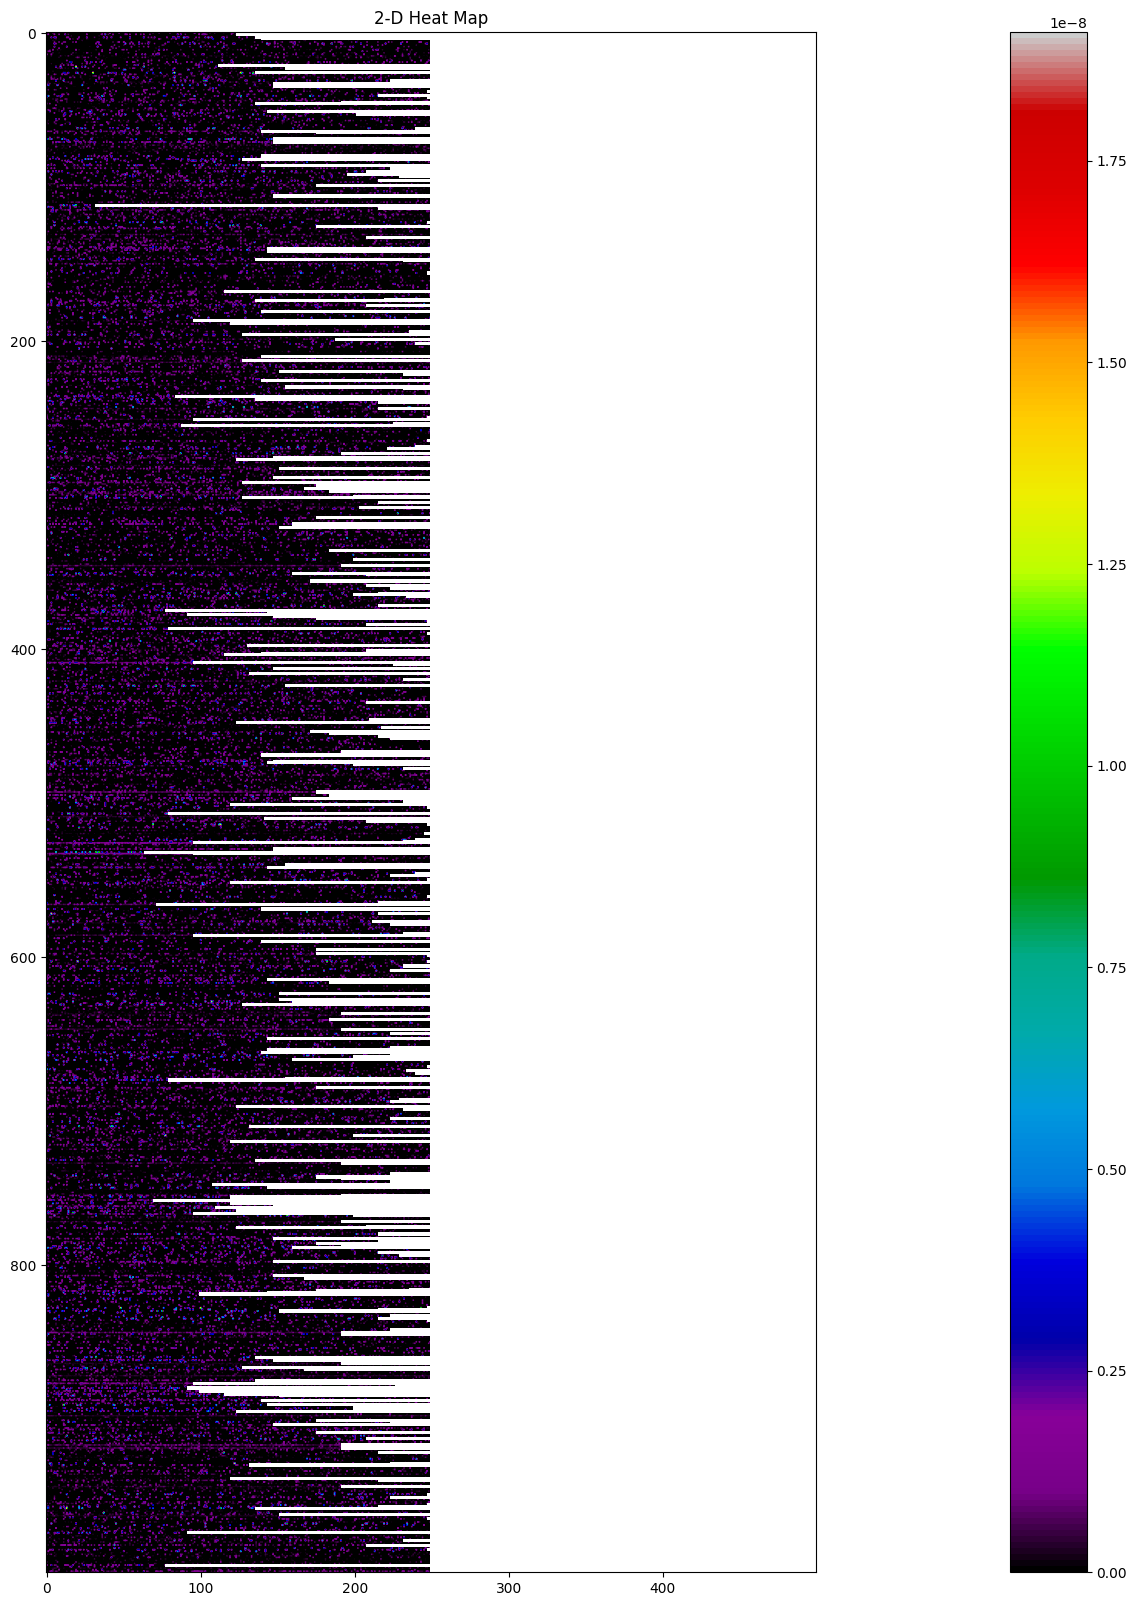

In [34]:
plt.figure(figsize=(50,20))
plt.imshow(data, cmap='nipy_spectral')
plt.colorbar()
 
plt.title( "2-D Heat Map" )
plt.show()

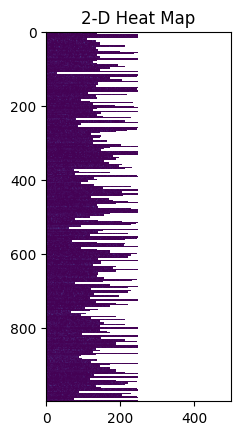

In [35]:
plt.imshow( data )
 
plt.title( "2-D Heat Map" )
plt.show()

## Probability Distributions

In [28]:
def probs_distribution(subset_probs_path, subset_length):
    subset_probs_df = pd.read_csv(subset_probs_path)
    probs = subset_probs_df.groupby("Name")["Probability"].sum()

    target_value = 1 / subset_length
    plt.hist(probs, bins=100)
    plt.plot([target_value, target_value], [0, 300])
    print(probs.mean())

### Aspirin

8.931844966224e-08


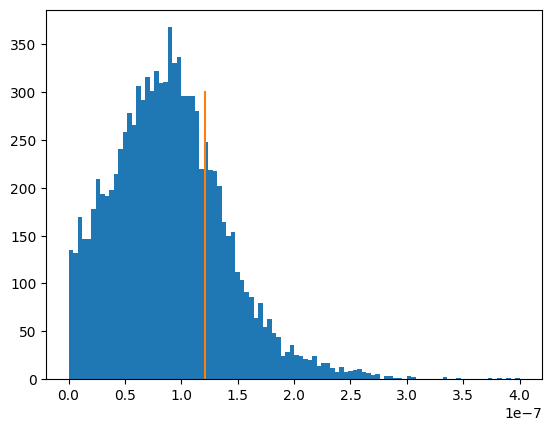

In [29]:
probs_distribution('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_canon_canon/aspirin/probs.csv', 8284280)

8.470515946654999e-08


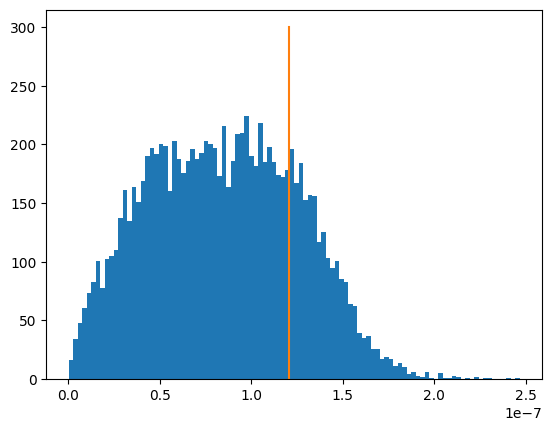

In [30]:
probs_distribution('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_canon_rand/aspirin/probs.csv', 8284280)

9.000031190441e-08


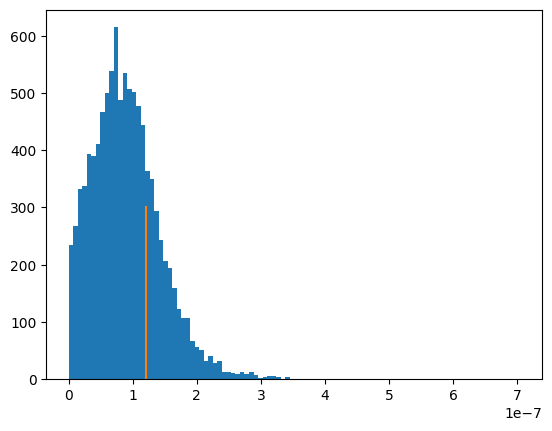

In [31]:
probs_distribution('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_rand_canon/aspirin/probs.csv', 8284280)

9.032141813519002e-08


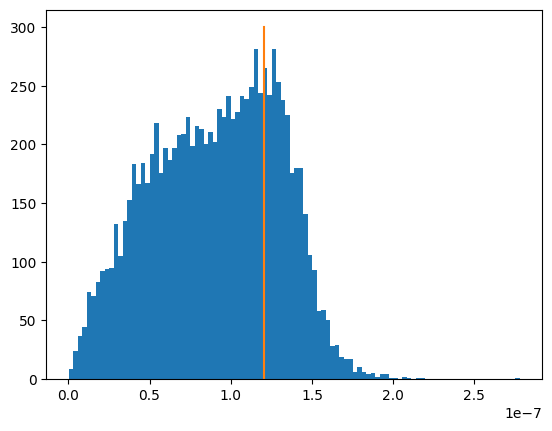

In [32]:
probs_distribution('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_rand_rand/aspirin/probs.csv', 8284280)

### Sas

1.2024984039323e-07


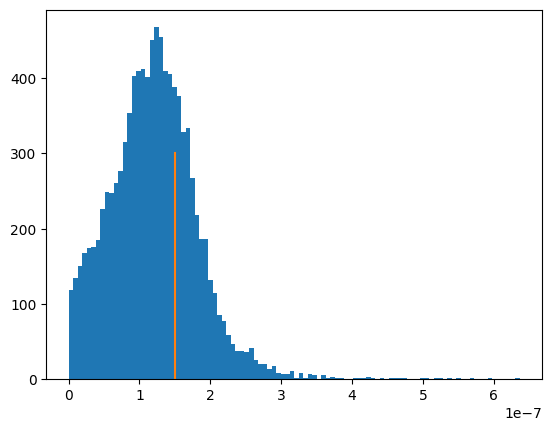

In [36]:
probs_distribution('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_canon_canon/sas/probs.csv', 6645440)

1.1042545212489e-07


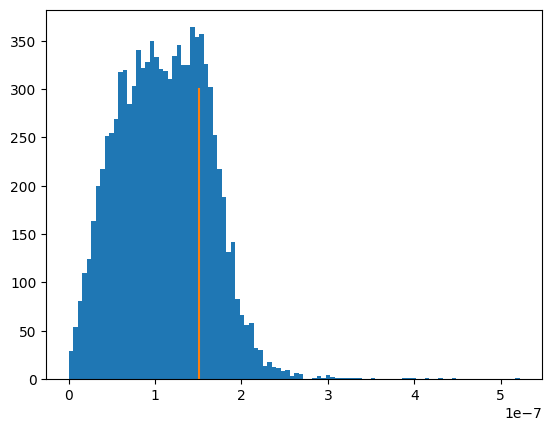

In [37]:
probs_distribution('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_canon_rand/sas/probs.csv', 6645440)

1.2004848151115e-07


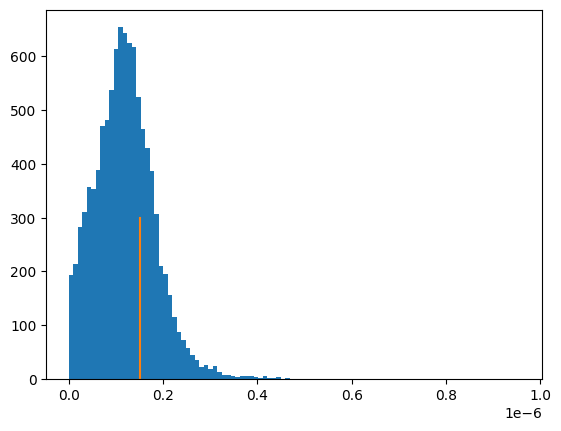

In [38]:
probs_distribution('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_rand_canon/sas/probs.csv', 6645440)

1.1494002779012e-07


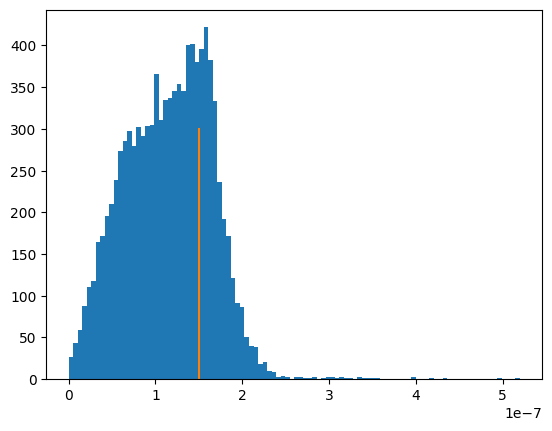

In [39]:
probs_distribution('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_rand_rand/sas/probs.csv', 6645440)

### Druglike Statistics

7.130956934697e-08


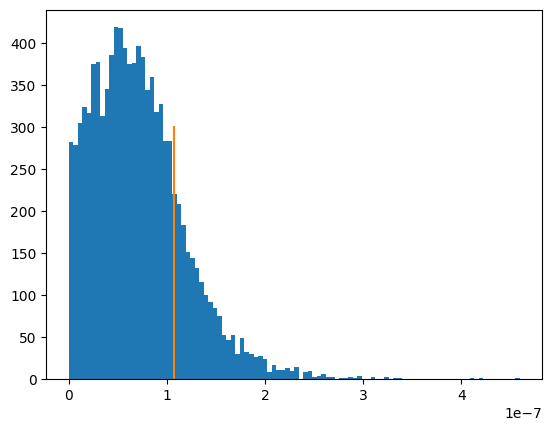

In [40]:
probs_distribution('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_canon_canon/druglike/probs.csv', 9331077)

6.531690397006e-08


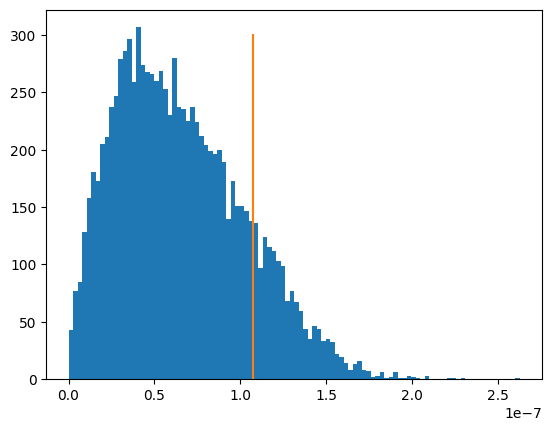

In [41]:
probs_distribution('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_canon_rand/druglike/probs.csv', 9331077)

7.268751774625e-08


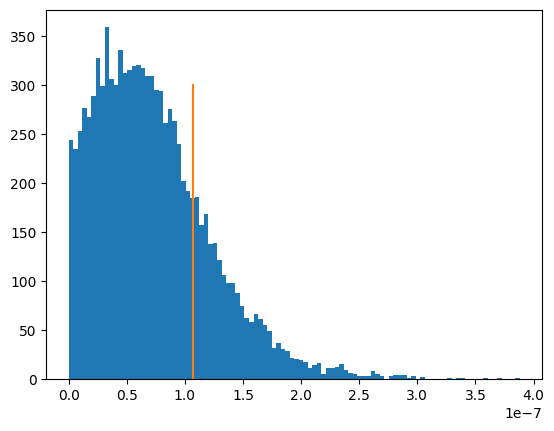

In [42]:
probs_distribution('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_rand_canon/druglike/probs.csv', 9331077)

6.985269258353998e-08


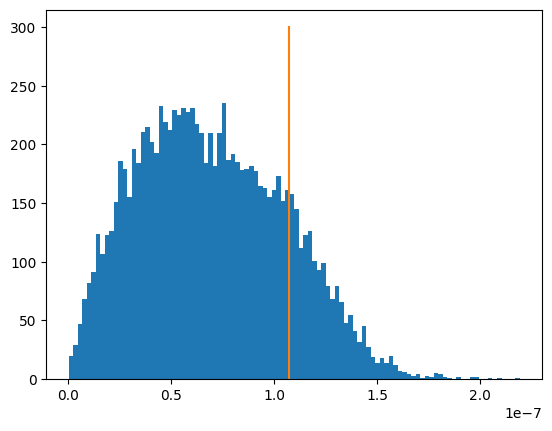

In [43]:
probs_distribution('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_rand_rand/druglike/probs.csv', 9331077)

### Equal Distance Statistics

1.677708673238e-08


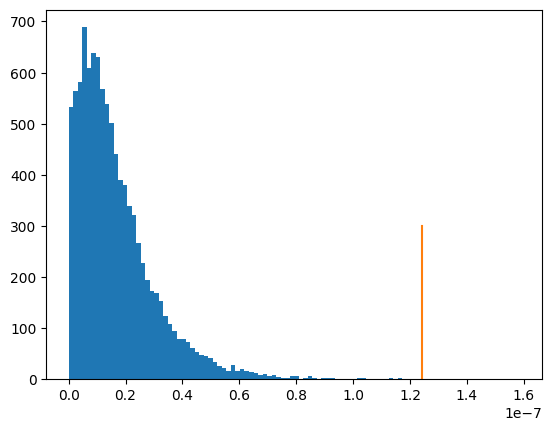

In [44]:
probs_distribution('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_canon_canon/eqdist/probs.csv', 8051185)

1.3406007788139997e-08


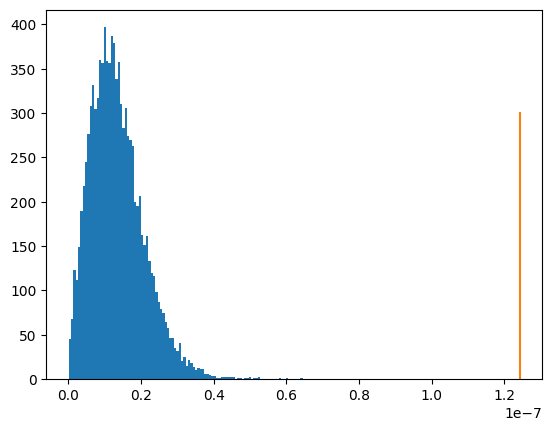

In [45]:
probs_distribution('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_canon_rand/eqdist/probs.csv', 8051185)

1.7535820492519997e-08


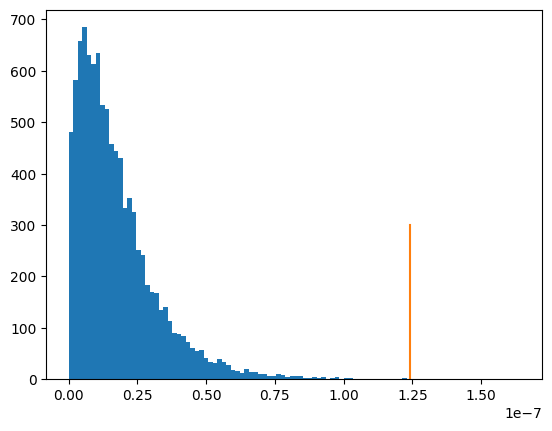

In [46]:
probs_distribution('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_rand_canon/eqdist/probs.csv', 8051185)

1.6981116891500002e-08


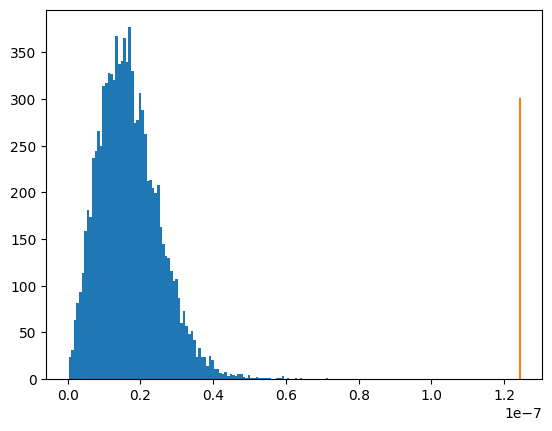

In [47]:
probs_distribution('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_rand_rand/eqdist/probs.csv', 8051185)